In [1]:
#Summer 2022 Data Science Intern Challenge

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_frame = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set.csv")


In [4]:
# a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

In [5]:
#  HYPOTHESIS
"""
    I think that the AOV = 3145.128000 is wrong because of the following reasons
    1. Outliers might be skewing data
        We can check this by looking at the standard deviation, box plot, comparing max and min order_amount
    2. Bulk Transactions might be skewing data 
        a) we need to check the frequency of total_items
        b) We need to check where order_amount is exceptionally high
"""

'\n    I think that the AOV = 3145.128000 is wrong because of the following reasons\n    1. Outliers might be skewing data\n        We can check this by looking at the standard deviation, box plot, comparing max and min order_amount\n    2. Bulk Transactions might be skewing data \n        a) we need to check the frequency of total_items\n        b) We need to check where order_amount is exceptionally high\n'

In [6]:
print (data_frame.order_amount.describe())

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


In [7]:
# We can confirm that the wrong calculation for AOV is in fact the mean of order_amount.
# The above data supports hypothesis 1. as the standard deviation is very high and the difference between the max and min is also a lot.

In [8]:
#We can confirm the same with a box plot

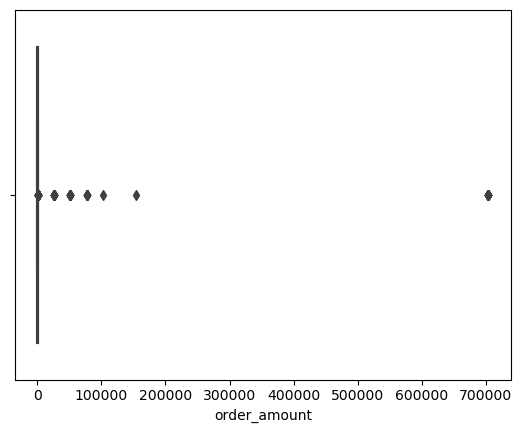

In [9]:
sns.boxplot(x=data_frame['order_amount'])
plt.show()

In [10]:
# We can see that the boxplot is a line on 0, this implies that there are many outliers with significant deviation which supports out hypothesis again.

In [11]:
# Hypothesis 2

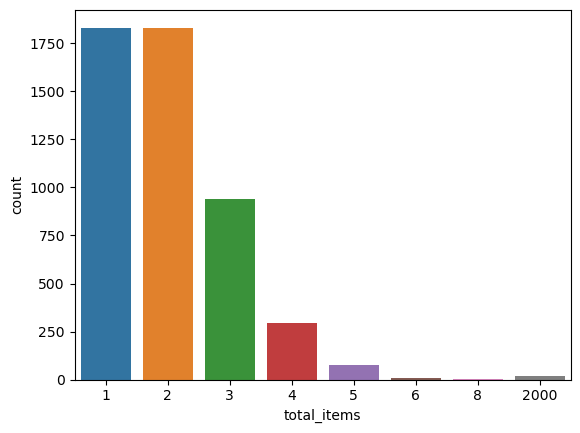

In [12]:
sns.countplot(x="total_items", data= data_frame)
plt.show()

In [13]:
dict1 = data_frame['total_items'].value_counts().to_dict()
l1 = (list(dict1.items()))
l1.sort()
print (l1)

[(1, 1830), (2, 1832), (3, 941), (4, 293), (5, 77), (6, 9), (8, 1), (2000, 17)]


In [14]:
#We see in the graph and dictionary that the frequency of total_items is significantly decraesing. Hence, the data points when total_items>5 could be outliers. We will confirm that by also looking at order_amount

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sorted_data_frame = data_frame.sort_values(by=['order_amount'], ascending=False)
print (sorted_data_frame.head(100))

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
2153      2154       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
520        521       42      607        704000         2000    credit_card   
1602      1603       42      607        704000         2000    credit_card   
60          61       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
4646      4647       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
1436      1437       42      607        704000         2000    credit_card   
4882      4883       42      607        704000         2000    credit_card   
4056      4057       42      607        704000         2000    credit_card   
15          16       42      607        704000         2000    c

In [16]:
# We can see here that a lot of bulk purchases are there. They are affecting our calculations.
# Another curious point is that bulk purchses are repeating on the same date and have the same shop id, user id, total_items for very differen bulk purchase order amount.


In [17]:
# A better way to evaulate this data
""" 
I have two possible methods
    1. IQR(Inter quartile range) method to remove outliers and then calculate median of remaining data
    2. Calculating the mean of order amounts that lie in the IQR without removing outliers
"""
# Detailed explanations below

' \nI have two possible methods\n    1. IQR(Inter quartile range) method to remove outliers and then calculate median of remaining data\n    2. Calculating the mean of order amounts that lie in the IQR without removing outliers\n'

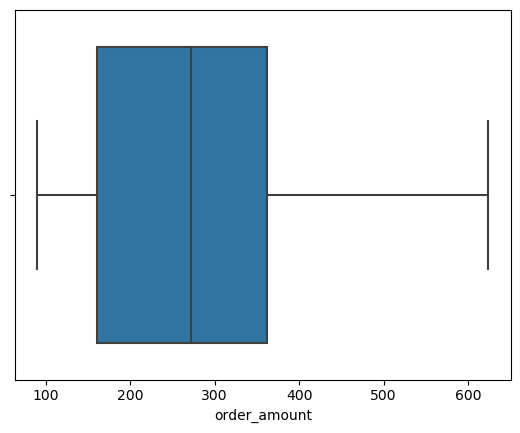

In [19]:
# Method 1 IQR score -> remove outliers -> median
"""
IQR score calculation
Calculate the first and third quartile (Q1 and Q3).
Further, evaluate the interquartile range, IQR = Q3-Q1.
Estimate the lower bound, the lower bound = Q1*1.5 (1.5*IQR rule)
Estimate the upper bound, upper bound = Q3*1.5
Remove the data points that lie outside of the lower and the upper bound.
"""

Q1 = data_frame.order_amount.quantile(0.25)
Q2 = data_frame.order_amount.quantile(0.5)
Q3 = data_frame.order_amount.quantile(0.75)
IQR = Q3 - Q1

# Creates new dataframe without outliers
new_data_frame = data_frame[(data_frame.order_amount < Q2 + IQR * 1.5) & (data_frame.order_amount > Q2 - IQR * 1.5)]
sns.boxplot(x=new_data_frame['order_amount'])
plt.show()

In [20]:
# We can see that the outliers have been removed from the new data frame. 

In [21]:
print (new_data_frame.order_amount.describe())
print ("median = ", new_data_frame.order_amount.median())

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64
median =  272.0


In [ ]:
#The AOV here is the median that is equal to $272

In [24]:
# Method 2: Mean of values in IQR without removing outliers
dict2 = data_frame['order_amount'].value_counts().to_dict()
l2 = (list(dict2.items()))
l2.sort(reverse=True)

sum=0
count=0
for i in range(0, len(l2)):
    if (l2[i][0]<Q3 and l2[i][0]>Q1):
        sum+=l2[i][0]
        count+=1
print ("mean = ", sum/count)

mean =  275.79761904761904


In [ ]:
#The AOV here is the mean that is equal to $275.79761904761904

In [ ]:
# b. What metric would you report for this dataset?

In [ ]:
"""
The difference between the AOV value in both methods is very less. 
But Method 1 is better as it removes the outliers first and then works with the clean data.
"""

In [ ]:
# Therefore, the metric I would report is the median of new dataframe

In [ ]:
# What is its value?